# MILESTONE 2

## Using Machine Learning Algorithm to Car Dataset 

## Data Preprocessing 

In [1]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler 

In [2]:
df=pd.read_csv('C:/Users/DELL/Downloads/car details v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [4]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [5]:
a=df['Model'].unique()
len(a)

1050

In [6]:
df.drop(columns=['Model'],inplace=True)

In [7]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [8]:
b=df['Year'].unique()
len(b)

22

In [9]:
c=df['Make'].unique()
len(c)

33

In [10]:
b=df['Location'].unique()
len(b)

77

In [11]:
df.isnull().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [12]:
enginex=df['Engine'].mode()[0]
enginex

'1197 cc'

In [13]:
df.Engine.fillna(enginex,inplace=True)

In [14]:
df=df.rename(columns={'Max Power':'Max_Power','Fuel Type':'Fuel_Type','Seller Type':'Seller_Type','Max Torque':'Max_Torque','Seating Capacity':'Seating_Capacity','Fuel Tank Capacity':'Fuel_Tank_Capacity'})

In [15]:
df

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [16]:
df['Width'].unique()

array([1680., 1695., 1595., 1745., 1830., 1730., 1777., 1821., 1814.,
       1822., 1734., 1579., 1894., 1682., 1600., 1515., 1620., 1780.,
       1520., 1699., 1645., 1770., 1490., 1765.,   nan, 1525., 1647.,
       1677., 1890., 2141., 1775., 1826., 1726., 1835., 1881., 1818.,
       1817., 1811., 1790., 1475., 1660., 1855., 1750., 1735., 1796.,
       1694., 1825., 1820., 1831., 2044., 1495., 1938., 1983., 1810.,
       1700., 1760., 1874., 1854., 1840., 1706., 1805., 1968., 2094.,
       1898., 1729., 1710., 1866., 1800., 1860., 2069., 1899., 1809.,
       1642., 1804., 1690., 1911., 1783., 2183., 1981., 1939., 1683.,
       1742., 2071., 2073., 2155., 1846., 1903., 1934., 1967., 1918.,
       1868., 1852., 1850., 1827., 1900., 1722., 1965., 2004., 1748.,
       1842., 1996., 1864., 1635., 1500., 2120., 1882., 1789., 1703.,
       1801., 1550., 2157., 2031., 1952., 1839., 2003., 1785., 1815.,
       1924., 1902., 1788., 1926., 1560., 2220., 1727., 1869., 1813.,
       1970., 1665.,

In [17]:
df['Height'].unique()

array([1505., 1555., 1550., 1510., 1795., 1485., 1432., 1612., 1476.,
       1671., 1478., 1706., 1469., 1560., 1475., 1675., 1630., 1564.,
       1466., 1605., 1620., 1500., 1601., 1708.,   nan, 1590., 1535.,
       1537., 1639., 1665., 1796., 1427., 1297., 1930., 1760., 1678.,
       1640., 1975., 1429., 1495., 1453., 1800., 1520., 1661., 1835.,
       1450., 1530., 1416., 1544., 1480., 1844., 1447., 1608., 1545.,
       1515., 1700., 1762., 1676., 1409., 1455., 1627., 1474., 1850.,
       1570., 1685., 1606., 1635., 1548., 1740., 1464., 1659., 1695.,
       1774., 1645., 1494., 1724., 1498., 1650., 1710., 1442., 1522.,
       1647., 1785., 1737., 1995., 1755., 1458., 1471., 1607., 1366.,
       1786., 1501., 1693., 1702., 1434., 1603., 1615., 1651., 1803.,
       1690., 1705., 1468., 1840., 1460., 1791., 1925., 1479., 1304.,
       1660., 1435., 1895., 1496., 1922., 1745., 1470., 1855., 1670.,
       1487., 1489., 1353., 1649., 1940., 1483., 1920., 1565., 1561.,
       1525., 1295.,

In [18]:
df.isnull().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel_Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller_Type             0
Engine                  0
Max_Power              80
Max_Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating_Capacity       64
Fuel_Tank_Capacity    113
dtype: int64

In [19]:
maxpowerx=df['Max_Power'].mode()[0]
maxpowerx

'89 bhp @ 4000 rpm'

In [20]:
df.Max_Power.fillna(maxpowerx,inplace=True)

In [21]:
maxtorquex=df['Max_Torque'].mode()[0]
maxtorquex

'200 Nm @ 1750 rpm'

In [22]:
df.Max_Torque.fillna(maxpowerx,inplace=True)

In [23]:
Drivetrainx=df['Drivetrain'].mode()[0]
Drivetrainx

'FWD'

In [24]:
df.Drivetrain.fillna(Drivetrainx,inplace=True)

In [25]:
Lengthx=df.Length.median()
Lengthx

4370.0

In [26]:
df.Length.fillna(Lengthx,inplace=True)

In [27]:
Widthx=df.Width.median()
Widthx

1770.0

In [28]:
df.Width.fillna(Widthx,inplace=True)

In [29]:
Heightx=df.Height.median()
Heightx

1545.0

In [30]:
df.Height.fillna(Heightx,inplace=True)

In [31]:
a=df['Seating_Capacity'].unique()
len(a)

7

In [32]:
Seating_Capacityx=df['Seating_Capacity'].median()
Seating_Capacityx

5.0

In [33]:
df.Seating_Capacity.fillna(Seating_Capacityx,inplace=True)

In [34]:
Fuel_Tank_Capacityx=df.Fuel_Tank_Capacity.median()
Fuel_Tank_Capacityx

50.0

In [35]:
df.Fuel_Tank_Capacity.fillna(Fuel_Tank_Capacityx,inplace=True)

In [36]:
df.isnull().sum()

Make                  0
Price                 0
Year                  0
Kilometer             0
Fuel_Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller_Type           0
Engine                0
Max_Power             0
Max_Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating_Capacity      0
Fuel_Tank_Capacity    0
dtype: int64

In [37]:
df

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Location,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [38]:
a=df['Location'].unique()
len(a)

77

In [39]:
df.drop(columns=['Location'],inplace=True)

In [40]:
df

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


<Axes: >

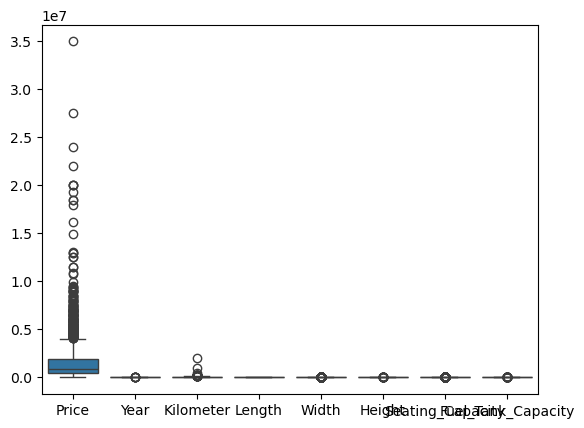

In [41]:
sns.boxplot(df)

In [42]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating_Capacity', 'Fuel_Tank_Capacity'],
      dtype='object')

In [43]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Remove outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

In [44]:
df

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
5,Maruti Suzuki,675000,2017,73315,Petrol,Manual,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,925000,2021,48000,Petrol,Manual,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
2052,Hyundai,409999,2014,68000,Diesel,Manual,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,3940.0,1710.0,1505.0,5.0,45.0
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [46]:
df

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
5,Maruti Suzuki,675000,2017,73315,Petrol,Manual,Grey,First,Individual,1373 cc,91 bhp @ 6000 rpm,130 Nm @ 4000 rpm,FWD,4490.0,1730.0,1485.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,Maruti Suzuki,925000,2021,48000,Petrol,Manual,White,First,Individual,1462 cc,103 bhp @ 6000 rpm,138 Nm @ 4400 rpm,FWD,3995.0,1790.0,1640.0,5.0,48.0
2052,Hyundai,409999,2014,68000,Diesel,Manual,Silver,First,Individual,1396 cc,90@4000,220@1750,FWD,3940.0,1710.0,1505.0,5.0,45.0
2053,Maruti Suzuki,245000,2014,79000,Petrol,Manual,White,Second,Individual,1197 cc,85 bhp @ 6000 rpm,113 Nm @ 4500 rpm,FWD,3775.0,1680.0,1620.0,5.0,43.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0


In [47]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Make']=label.fit_transform(df['Make'])
df['Year']=label.fit_transform(df['Year'])
df['Fuel_Type']=label.fit_transform(df['Fuel_Type'])
df['Transmission']=label.fit_transform(df['Transmission'])
df['Color']=label.fit_transform(df['Color'])
df['Seller_Type']=label.fit_transform(df['Seller_Type'])
df['Engine']=label.fit_transform(df['Engine'])
df['Max_Power']=label.fit_transform(df['Max_Power'])
df['Max_Torque']=label.fit_transform(df['Max_Torque'])
df['Drivetrain']=label.fit_transform(df['Drivetrain'])
df['Owner']=label.fit_transform(df['Owner'])
df

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,6,505000,9,87150,4,1,7,1,1,6,151,4,1,3990.0,1680.0,1505.0,5.0,35.0
1,16,450000,6,75000,1,1,14,3,2,8,130,73,1,3995.0,1695.0,1555.0,5.0,42.0
2,7,220000,3,67000,4,1,8,1,2,5,140,9,1,3585.0,1595.0,1550.0,5.0,35.0
3,23,799000,11,37500,4,1,12,1,2,5,144,13,1,3995.0,1745.0,1510.0,5.0,37.0
5,16,675000,9,73315,4,1,7,1,2,14,162,29,1,4490.0,1730.0,1485.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,16,925000,13,48000,4,1,14,1,2,20,5,33,1,3995.0,1790.0,1640.0,5.0,48.0
2052,7,409999,6,68000,1,1,13,1,2,16,160,88,1,3940.0,1710.0,1505.0,5.0,45.0
2053,16,245000,6,79000,4,1,14,3,2,5,149,15,1,3775.0,1680.0,1620.0,5.0,43.0
2055,7,275000,6,83000,4,1,14,3,2,55,105,141,1,3495.0,1550.0,1500.0,5.0,32.0


In [48]:
x=df[['Make','Year','Kilometer','Fuel_Type','Transmission','Color','Owner','Seller_Type','Engine','Max_Power','Max_Torque','Drivetrain','Length','Width','Height','Seating_Capacity','Fuel_Tank_Capacity']]

In [49]:
x

,Make,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,6,9,87150,4,1,7,1,1,6,151,4,1,3990.0,1680.0,1505.0,5.0,35.0
1,16,6,75000,1,1,14,3,2,8,130,73,1,3995.0,1695.0,1555.0,5.0,42.0
2,7,3,67000,4,1,8,1,2,5,140,9,1,3585.0,1595.0,1550.0,5.0,35.0
3,23,11,37500,4,1,12,1,2,5,144,13,1,3995.0,1745.0,1510.0,5.0,37.0
5,16,9,73315,4,1,7,1,2,14,162,29,1,4490.0,1730.0,1485.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,16,13,48000,4,1,14,1,2,20,5,33,1,3995.0,1790.0,1640.0,5.0,48.0
2052,7,6,68000,1,1,13,1,2,16,160,88,1,3940.0,1710.0,1505.0,5.0,45.0
2053,16,6,79000,4,1,14,3,2,5,149,15,1,3775.0,1680.0,1620.0,5.0,43.0
2055,7,6,83000,4,1,14,3,2,55,105,141,1,3495.0,1550.0,1500.0,5.0,32.0


In [50]:
y=df['Price']
y

0       505000
1       450000
2       220000
3       799000
5       675000
         ...  
2051    925000
2052    409999
2053    245000
2055    275000
2056    240000
Name: Price, Length: 1290, dtype: int64

In [51]:
a=df['Year'].unique()
len(a)

15

In [52]:
from sklearn.feature_selection import f_classif
a=f_classif(x,y)
a

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [15] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(array([1.24270134, 3.31685859, 1.26020872, 1.26666946, 2.96390008,
        1.15363953, 1.36857749, 1.45463052, 1.73468918, 1.65943316,
        1.83132598, 2.22699034, 2.92017757, 4.80012178, 1.73410167,
               nan, 3.19883692]),
 array([4.54330865e-03, 4.34892377e-50, 2.73358074e-03, 2.25497778e-03,
        2.31083587e-41, 4.34007910e-02, 7.79876904e-05, 2.98218367e-06,
        1.02852885e-11, 3.83068584e-10, 8.13918129e-14, 4.45838462e-23,
        2.83451528e-40, 1.51808401e-84, 1.05857104e-11,            nan,
        3.47367394e-47]))

In [53]:
a=pd.Series(a[1])
a.index=x.columns
a

Make                  4.543309e-03
Year                  4.348924e-50
Kilometer             2.733581e-03
Fuel_Type             2.254978e-03
Transmission          2.310836e-41
Color                 4.340079e-02
Owner                 7.798769e-05
Seller_Type           2.982184e-06
Engine                1.028529e-11
Max_Power             3.830686e-10
Max_Torque            8.139181e-14
Drivetrain            4.458385e-23
Length                2.834515e-40
Width                 1.518084e-84
Height                1.058571e-11
Seating_Capacity               NaN
Fuel_Tank_Capacity    3.473674e-47
dtype: float64

In [52]:
df.corr()

,Make,Price,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
Make,1.000000,-0.151593,0.090115,-0.010875,0.070343,0.103255,-0.007859,-0.023386,-0.065833,-0.038398,0.027694,-0.026252,0.142839,-0.098756,-0.077391,-0.002072,NaN,-0.111881
Price,-0.151593,1.000000,0.359083,-0.222408,-0.276847,-0.576150,-0.102191,-0.013224,-0.047660,0.376729,-0.326121,0.371572,-0.048872,0.577294,0.651805,0.031687,NaN,0.580534
Year,0.090115,0.359083,1.000000,-0.544330,0.051215,-0.104241,-0.034181,-0.303599,-0.033507,0.113517,-0.126274,-0.028119,-0.005244,-0.028179,0.177736,0.228817,NaN,-0.021941
Kilometer,-0.010875,-0.222408,-0.544330,1.000000,-0.330950,0.133711,0.049844,0.222557,0.021819,-0.062488,0.066438,0.085744,-0.045789,0.124766,0.023458,-0.053598,NaN,0.128857
Fuel_Type,0.070343,-0.276847,0.051215,-0.330950,1.000000,0.028989,-0.050421,-0.096607,-0.028957,-0.122569,0.028384,-0.487837,0.052284,-0.269470,-0.384240,-0.175462,NaN,-0.420255
Transmission,0.103255,-0.576150,-0.104241,0.133711,0.028989,1.000000,0.108294,-0.076414,0.044984,-0.299674,0.295726,-0.246234,0.033306,-0.387314,-0.367751,0.105057,NaN,-0.367443
Color,-0.007859,-0.102191,-0.034181,0.049844,-0.050421,0.108294,1.000000,-0.014310,0.005939,-0.055826,0.066321,0.004355,0.040616,-0.107967,-0.089025,0.006199,NaN,-0.068616
Owner,-0.023386,-0.013224,-0.303599,0.222557,-0.096607,-0.076414,-0.014310,1.000000,0.043992,0.017130,0.003335,0.144696,-0.029177,0.085807,0.028540,-0.055948,NaN,0.058707
Seller_Type,-0.065833,-0.047660,-0.033507,0.021819,-0.028957,0.044984,0.005939,0.043992,1.000000,-0.010014,0.053765,-0.000841,0.011622,-0.068098,-0.038579,0.026400,NaN,-0.054705
Engine,-0.038398,0.376729,0.113517,-0.062488,-0.122569,-0.299674,-0.055826,0.017130,-0.010014,1.000000,-0.492969,0.542324,-0.023740,0.276356,0.120093,-0.050667,NaN,0.252948


<Axes: >

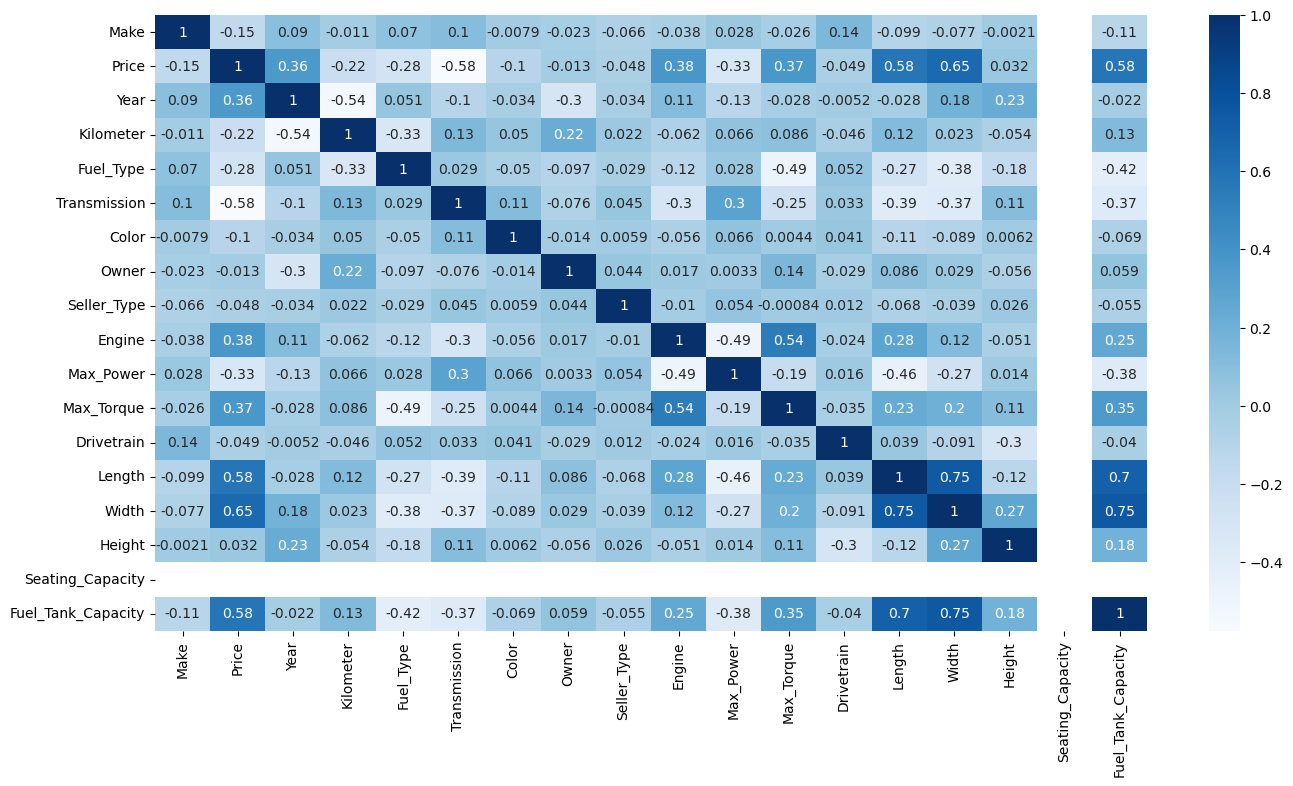

In [53]:
a=df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(a,annot=True,cmap='Blues')

In [54]:
from sklearn.preprocessing import StandardScaler 

In [55]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.80385986,  0.20738222,  1.38232761, ..., -0.47814779,
         0.        , -1.21719884],
       [ 0.64362649, -0.77615846,  0.91961483, ...,  0.20142853,
         0.        , -0.4494083 ],
       [-0.65911123, -1.75969914,  0.61494798, ...,  0.13347089,
         0.        , -1.21719884],
       ...,
       [ 0.64362649, -0.77615846,  1.07194826, ...,  1.08487773,
         0.        , -0.33972393],
       [-0.65911123, -0.77615846,  1.22428168, ..., -0.54610542,
         0.        , -1.54625194],
       [-0.9486085 , -1.10400535,  0.84344812, ..., -1.53828683,
         0.        , -0.12035521]])

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [57]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression()

In [58]:
output_predict=lin.predict(x_test)

In [59]:
output_predict

array([ 630664.62096076,  564774.85828401,  374170.67789192,
        972039.69612807,  485142.21601977, 1512364.41549959,
       1036123.19678686,  787005.94285617,  982069.18801735,
       1501722.11909088, 1057571.18185242, 1825088.77093926,
       1311506.65363367, 2081012.64822368,  688851.76597834,
       1564277.6719006 ,  514208.5608709 , 1051594.43851897,
        562144.45874829,  762089.96996184,  442685.81981302,
        829106.87529885, 2135126.68945999,  322387.66580948,
       1118537.37898786,  444288.0731332 ,  635365.50013663,
        190949.97723717, 2101003.11186491,  321923.72798462,
        729147.53463321,  783939.02596554,  902591.70720611,
       1928934.07976811,  893142.81773695,   48039.0259224 ,
         27348.9148395 ,  712166.10629124,  109947.93402277,
        615584.97439936,  308224.7419369 ,  621094.6592151 ,
       1337700.26797331, 1610372.27035863,  493310.86740986,
        808082.40033508,  289167.32361541,  186084.70387641,
       1481519.42848218,

In [60]:
y_test

1785    375000
1902    365000
720     495000
98      750000
74      299000
         ...  
220     295000
1916    515000
1681    625000
547     450000
532     350000
Name: Price, Length: 258, dtype: int64

In [61]:
error=mean_squared_error(y_test,output_predict)
error

209826209272.6186

In [62]:
performance=r2_score(y_test,output_predict)
performance

0.6787292365276565

# Lasso

In [64]:
from sklearn.linear_model import Lasso

In [65]:
lass=Lasso()

In [66]:
parameter={'alpha':[1e-15,1e-20,1e-17,1e-6,7,9,10,20,1e-25,1e-22]}

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
lassohp=GridSearchCV(lass,parameter,scoring='neg_mean_squared_error',cv=10)

In [69]:
lassohp.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.143e+13, tolerance: 4.966e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.550e+13, tolerance: 5.341e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.397e+13, tolerance: 

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.511e+13, tolerance: 5.219e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.143e+13, tolerance: 4.966e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Ob

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.397e+13, tolerance: 5.254e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.434e+13, tolerance: 5.286e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-20, 1e-17, 1e-06, 7, 9, 10, 20,
                                   1e-25, 1e-22]},
             scoring='neg_mean_squared_error')

In [70]:
print(lassohp.best_params_)

{'alpha': 20}


In [71]:
print(lassohp.best_score_)

-166846676006.73895


In [72]:
afterhplasso=Lasso(20)

In [73]:
afterhplasso.fit(x_train,y_train)

Lasso(alpha=20)

In [74]:
prediction_hp=afterhplasso.predict(x_test)

In [75]:
prediction_hp

array([ 630708.78494521,  564712.05455062,  374168.18054139,
        971997.64570677,  485095.77449986, 1512426.34472018,
       1036044.57209677,  786986.92009416,  982148.04021621,
       1501754.86327996, 1057550.40763059, 1824981.44654847,
       1311447.60192095, 2080891.94287134,  688836.29513805,
       1564387.37323589,  514248.94478529, 1051570.15687   ,
        562096.39124563,  762134.74328581,  442640.2567668 ,
        829034.91358309, 2134991.78268457,  322492.44796399,
       1118520.21982349,  444239.97865408,  635323.64784676,
        190949.85508999, 2100998.17101252,  321925.16488736,
        729145.89305601,  783980.05817505,  902550.45518521,
       1928842.31111594,  893115.35551218,   48089.38573439,
         27459.49727331,  712167.19829679,  110001.15867225,
        615615.90158762,  308219.62708499,  621207.91431253,
       1337724.28349629, 1610291.22286332,  493452.85738969,
        808273.98347429,  289167.66676274,  186137.2037391 ,
       1481536.63371372,

In [76]:
y_test

1785    375000
1902    365000
720     495000
98      750000
74      299000
         ...  
220     295000
1916    515000
1681    625000
547     450000
532     350000
Name: Price, Length: 258, dtype: int64

In [77]:
error=mean_squared_error(y_test,prediction_hp)
error

209827445966.3872

In [78]:
performance=r2_score(y_test,prediction_hp)
performance

0.6787273429913219

# Ridge

In [79]:
from sklearn.linear_model import Ridge

In [80]:
hpridge=Ridge()

In [81]:
parameter={'alpha':[1e-15,1e-20,1e-17,1e-6,7,9,10,20,1e-25,1e-22]}

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
ridgehp=GridSearchCV(hpridge,parameter,scoring='neg_mean_squared_error',cv=10)

In [84]:
ridgehp.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.25758e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.22425e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.22169e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.25421e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: Li

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-20, 1e-17, 1e-06, 7, 9, 10, 20,
                                   1e-25, 1e-22]},
             scoring='neg_mean_squared_error')

In [85]:
print(ridgehp.best_params_)

{'alpha': 10}


In [86]:
print(ridgehp.best_score_)

-166813832937.80957


In [87]:
afterhpridge=Ridge(20)

In [88]:
afterhpridge.fit(x_train,y_train)

Ridge(alpha=20)

In [89]:
prediction_hp=afterhpridge.predict(x_test)

In [90]:
prediction_hp

array([ 634791.36583926,  561853.40864484,  373240.60677176,
        979465.45187916,  476654.35671656, 1519531.49368545,
       1039485.11209325,  773463.92684565,  989564.68870869,
       1506136.42525653, 1064582.4363393 , 1811654.33540491,
       1298165.84114183, 2079165.95124967,  700422.7908481 ,
       1551362.1612506 ,  502978.30534222, 1040296.47883309,
        570656.21275747,  772417.1972557 ,  444518.56823667,
        826205.24926133, 2116146.81680039,  334441.55788659,
       1124417.74769508,  447556.58868001,  645669.56802885,
        191900.87508154, 2101668.45086798,  310860.1605846 ,
        716633.58012731,  778758.17783766,  908050.66434942,
       1925033.80792789,  876809.502576  ,   69517.19234609,
         42232.35585555,  714228.66436239,  112009.63024471,
        607866.22196921,  308284.14533054,  639758.44929887,
       1334377.7390528 , 1586809.63172015,  496721.19244213,
        814862.89810837,  287594.53201391,  195009.96329087,
       1471033.53497376,

In [91]:
y_test

1785    375000
1902    365000
720     495000
98      750000
74      299000
         ...  
220     295000
1916    515000
1681    625000
547     450000
532     350000
Name: Price, Length: 258, dtype: int64

In [92]:
error=mean_squared_error(y_test,prediction_hp)
error

209288499991.75327

In [93]:
performance=r2_score(y_test,prediction_hp)
performance

0.6795525382104568

# DecisionTree

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
regressor = DecisionTreeRegressor()

In [96]:
x

,Make,Year,Kilometer,Fuel_Type,Transmission,Color,Owner,Seller_Type,Engine,Max_Power,Max_Torque,Drivetrain,Length,Width,Height,Seating_Capacity,Fuel_Tank_Capacity
0,6,9,87150,4,1,7,1,1,6,151,4,1,3990.0,1680.0,1505.0,5.0,35.0
1,16,6,75000,1,1,14,3,2,8,130,73,1,3995.0,1695.0,1555.0,5.0,42.0
2,7,3,67000,4,1,8,1,2,5,140,9,1,3585.0,1595.0,1550.0,5.0,35.0
3,23,11,37500,4,1,12,1,2,5,144,13,1,3995.0,1745.0,1510.0,5.0,37.0
5,16,9,73315,4,1,7,1,2,14,162,29,1,4490.0,1730.0,1485.0,5.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2051,16,13,48000,4,1,14,1,2,20,5,33,1,3995.0,1790.0,1640.0,5.0,48.0
2052,7,6,68000,1,1,13,1,2,16,160,88,1,3940.0,1710.0,1505.0,5.0,45.0
2053,16,6,79000,4,1,14,3,2,5,149,15,1,3775.0,1680.0,1620.0,5.0,43.0
2055,7,6,83000,4,1,14,3,2,55,105,141,1,3495.0,1550.0,1500.0,5.0,32.0


In [97]:
y

0       505000
1       450000
2       220000
3       799000
5       675000
         ...  
2051    925000
2052    409999
2053    245000
2055    275000
2056    240000
Name: Price, Length: 1290, dtype: int64

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [99]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [100]:
param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 2,4]
   
}

In [101]:
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [102]:

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [103]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [104]:
y_best_pred = best_model.predict(x_test)

In [105]:
mse_best = mean_squared_error(y_test, y_best_pred)
mse_best

99981083149.1508

In [106]:
r2_best = r2_score(y_test, y_best_pred)
r2_best

0.854513710563713

# KNNRegressor

In [107]:
from sklearn.neighbors import KNeighborsRegressor

In [108]:
knn=KNeighborsRegressor()

In [109]:
a=[]
for i in range(1,40):
    a.append(i)

a

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [110]:
param={'n_neighbors' : a,
       'weights' : ['uniform','distance'],
       'algorithm' : ['auto','ball_tree']}

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
knn1=GridSearchCV(knn,param,cv=5,scoring='neg_mean_squared_error')
knn1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [113]:
knn1.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}

In [114]:
knn1.best_score_

-420054629775.63074

In [115]:
pr=knn1.predict(x_test)
mean_squared_error(y_test,pr) 

482335811352.04877

In [116]:
r2_score(y_test,pr)

0.2981347546398676

# Support vector Machine

## Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rf = RandomForestRegressor()

In [119]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [120]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [121]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [122]:
grid_search.best_score_

-82329450426.52579

In [123]:
best_rf = grid_search.best_estimator_
best_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=2, n_estimators=300)

In [124]:
y_pre = best_rf.predict(x_test)

In [125]:
mse = mean_squared_error(y_test, y_pre)
mse

80498945989.82417

In [126]:
mae = mean_absolute_error(y_test, y_pre)
mae

147575.89743972075

In [127]:
r2 = r2_score(y_test, y_pre)
r2

0.8828629117958193

In [128]:
y_pred = best_rf.predict(x_train)

79102.7679531125

0.9622416710754638

In [ ]:
import joblib
joblib.dump(grid_search,'C:/Users/DELL/Downloads/DA and DS/Advanced mAchine Learning/Car Data.pkl')

## Random Forest Regressor = Error - 80498945989.82417 , r2-Score - 0.8828629117958193
    
              